In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

In [36]:
IMAGE_SIZE = 256
EPOCHS = 50

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size= (IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

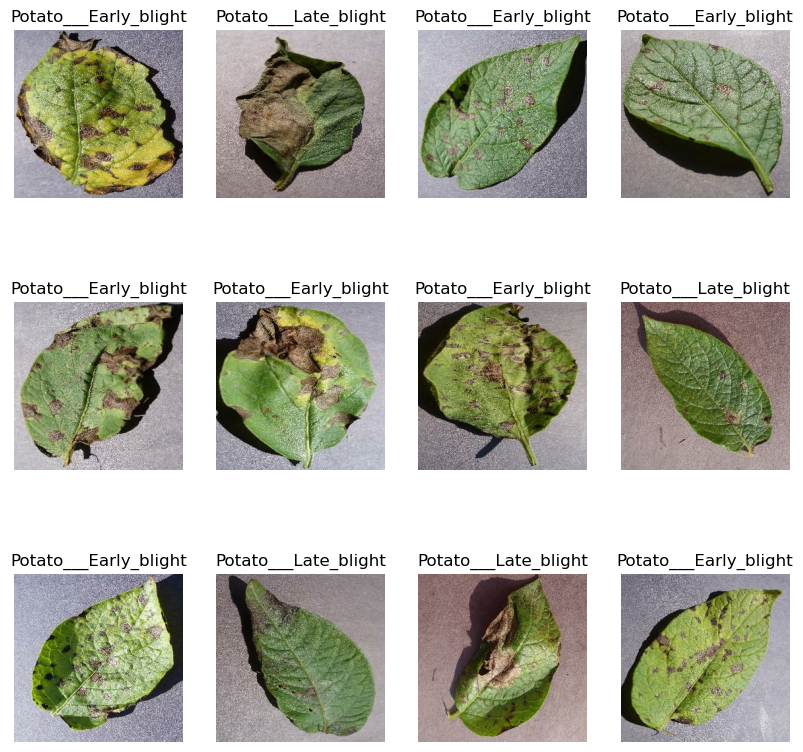

In [17]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [19]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54).skip(6)
val_ds = dataset.skip(54).take(6)


In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [33]:
model = tf.keras.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(32, IMAGE_SIZE, IMAGE_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(3, activation="softmax")
    
])

model.build(input_shape=(32, IMAGE_SIZE, IMAGE_SIZE, 3))

In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   multiple                  0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [35]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history=model.fit(train_ds,epochs=EPOCHS,batch_size=32, verbose=1,validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 231s 4s/step - loss: 0.8892 - accuracy: 0.4942 - val_loss: 0.7824 - val_accuracy: 0.5417
Epoch 2/50
54/54 [==============================] - 203s 4s/step - loss: 0.6142 - accuracy: 0.7002 - val_loss: 0.4513 - val_accuracy: 0.7812
Epoch 3/50
54/54 [==============================] - 208s 4s/step - loss: 0.4523 - accuracy: 0.7922 - val_loss: 0.4012 - val_accuracy: 0.7917
Epoch 4/50
54/54 [==============================] - 196s 4s/step - loss: 0.4284 - accuracy: 0.8119 - val_loss: 0.3217 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 163s 3s/step - loss: 0.4102 - accuracy: 0.8241 - val_loss: 0.3903 - val_accuracy: 0.8177
Epoch 6/50
54/54 [==============================] - 136s 3s/step - loss: 0.3567 - accuracy: 0.8495 - val_loss: 0.4116 - val_accuracy: 0.8125
Epoch 7/50
54/54 [==============================] - 137s 3s/step - loss: 0.3599 - accuracy: 0.8466 - val_loss: 0.3372 - val_accuracy: 0.8385
Epoch 8/50
54

In [38]:
scores =model.evaluate(test_ds)

8/8 [==============================] - 7s 546ms/step - loss: 0.0208 - accuracy: 0.9957


In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

len(val_acc)

50

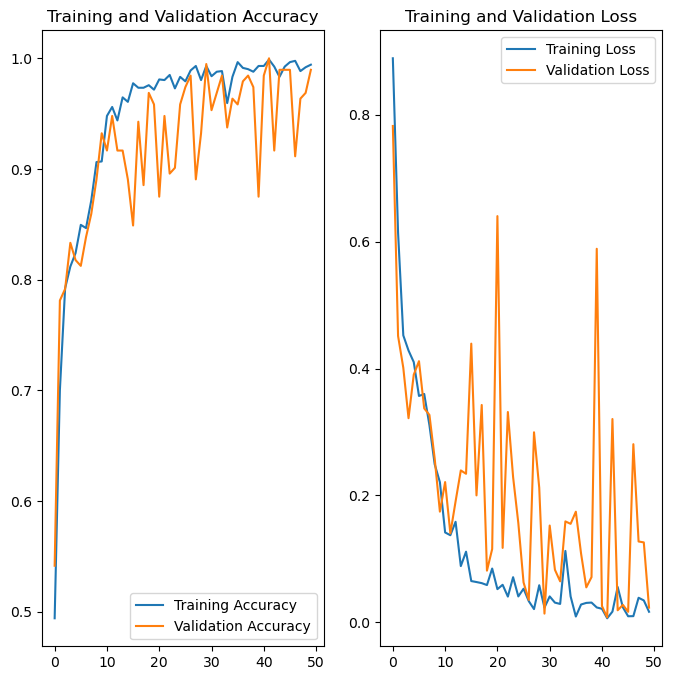

In [47]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



real image
real label:  Potato___Early_blight
1/1 [==============================] - 1s 796ms/step
predected label : Potato___Early_blight


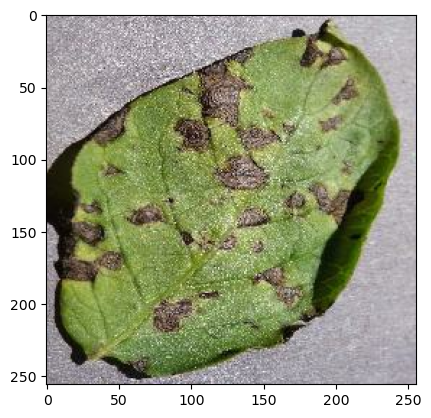

In [49]:
for image_batch, label_batch in dataset.take(1):
    print("real image")
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print("real label: ", class_names[label_batch[0].numpy()])
    print("predected label :", class_names[np.argmax(model.predict(image_batch)[0])])

In [70]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 37ms/step


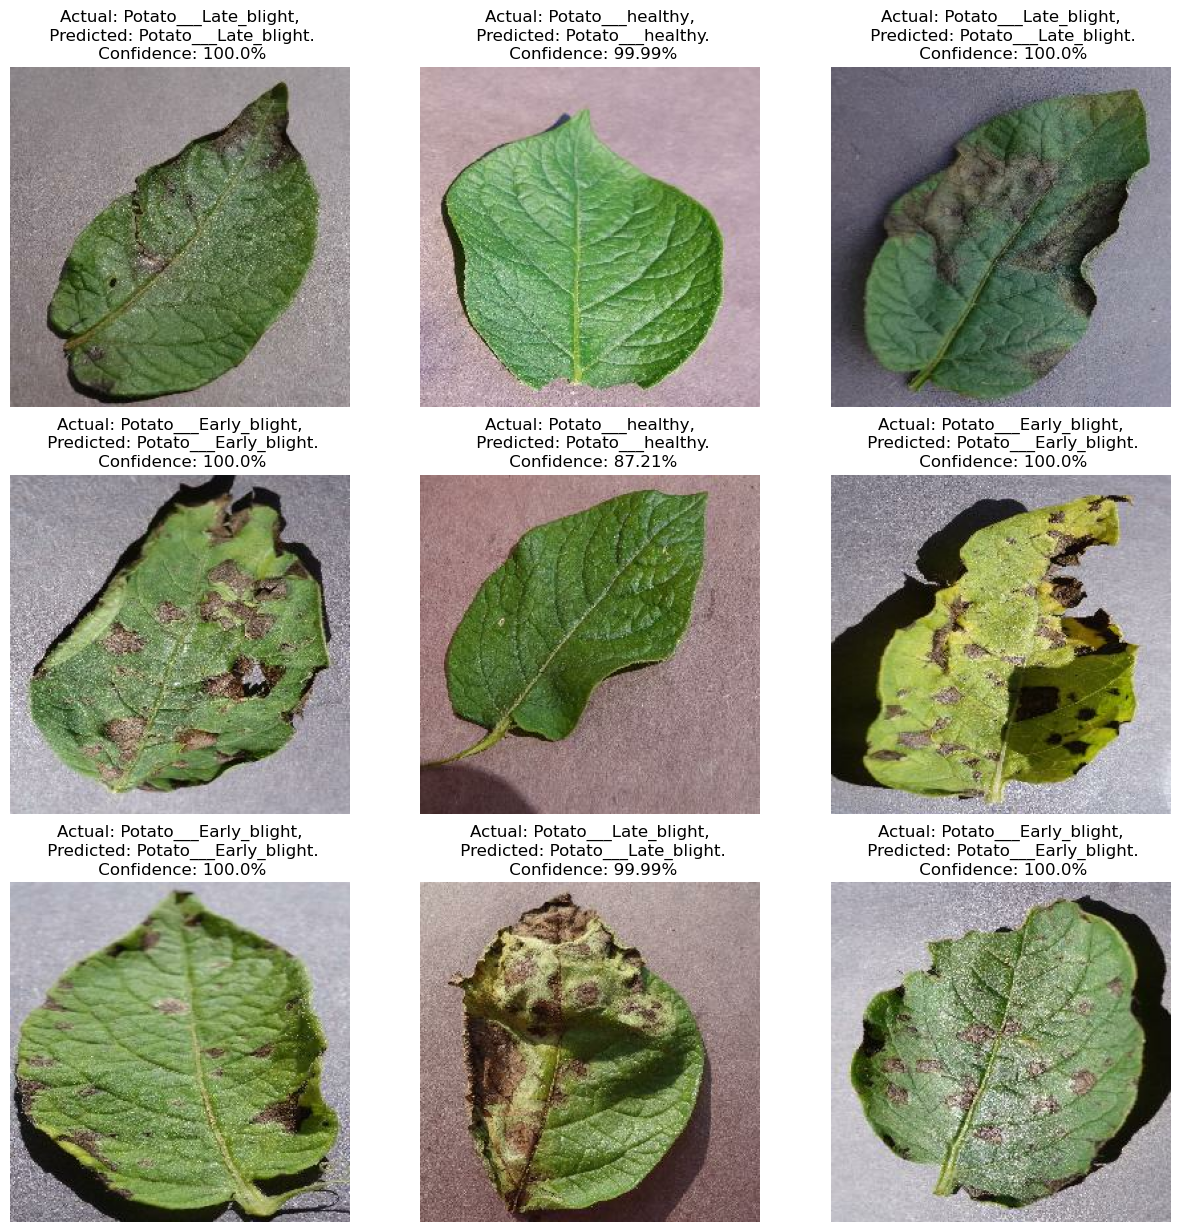

In [71]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [74]:
model_version = max([int (i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [6]:
MODEL = tf.keras.models.load_model("../models/1")

In [7]:
MODEL.save("../potato.h5")

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
